In [156]:
import pandas as pd
import numpy as np
import plotly.express as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [3]:
gender=pd.read_csv("gender_submission.csv")
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")

In [4]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.Survived.value_counts()
#train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

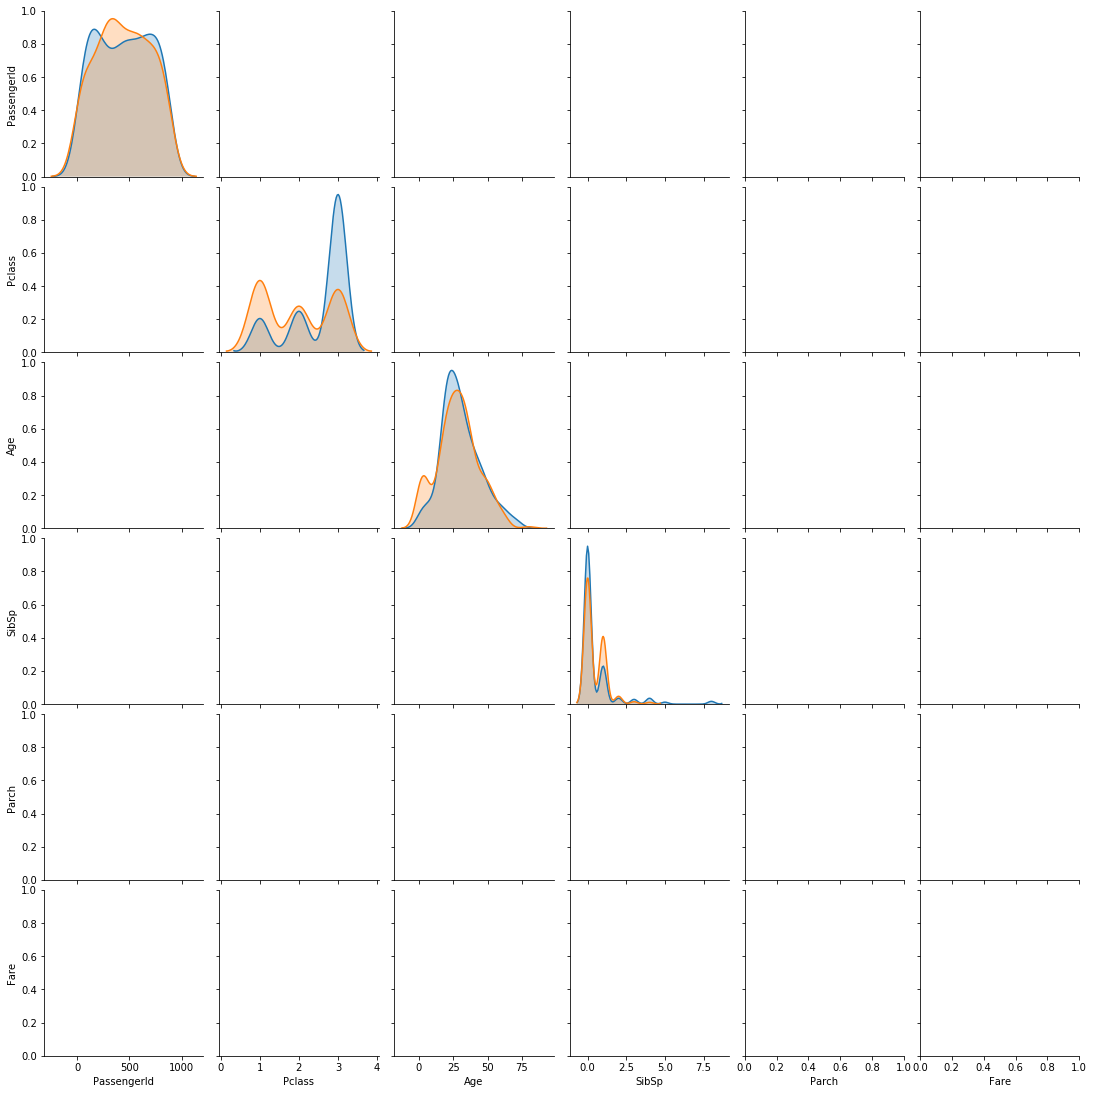

In [8]:
sns.pairplot(train, hue='Survived')

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Original Model creation with the group

In [10]:
sex = pd.get_dummies(train.Sex, prefix='Sex').drop(columns = "Sex_female")
train["Sex"] = sex
embarked = pd.get_dummies(train.Embarked, prefix='Embarked').drop(columns = "Embarked_S")
train["Embarked_C"] = embarked["Embarked_C"]
train["Embarked_Q"] = embarked["Embarked_Q"]
train["Age"] = train["Age"].replace(np.NaN, train["Age"].mean())
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,S,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C,1,0


In [11]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeRegressor(random_state=1)

# Fit iowa_model with the training data.
model.fit(train.drop(columns = ["Survived","Name","Ticket","Embarked","Cabin"]),train["Survived"])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [12]:
sex = pd.get_dummies(test.Sex, prefix='Sex').drop(columns = "Sex_female")
test["Sex"] = sex
embarked = pd.get_dummies(test.Embarked, prefix='Embarked').drop(columns = "Embarked_S")
test["Embarked_C"] = embarked["Embarked_C"]
test["Embarked_Q"] = embarked["Embarked_Q"]
test["Age"] = test["Age"].replace(np.NaN, train["Age"].mean())
test["Fare"] = test["Fare"].replace(np.NaN, train["Fare"].mean())

In [13]:
y_pred = model.predict(test.drop(columns = ["Name","Ticket","Embarked","Cabin"]))

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(gender["Survived"], y_pred)

0.7416267942583732

We did get a 74% accuracy. However, we did a few things wrong. We used the true values to be the values that we are getting from the example data (we imported that dataset as gender), so we need to adjust that. We also dropped a lot of columns that could be helpful.

## One Hot Encoding Cabin Model

In [161]:
from sklearn.model_selection import train_test_split
df=pd.read_csv("train.csv")
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="Survived"), df["Survived"], test_size = 0.33, random_state=1)

#Drop the unique columns that won't help our model. Both in the test and train datasets
X_train.drop(columns = ["Name","Ticket", "PassengerId"], inplace = True)
X_test.drop(columns = ["Name","Ticket", "PassengerId"], inplace = True)

#Impute the numerical variables with mean
X_train["Age"] = X_train["Age"].replace(np.NaN, X_train["Age"].mean())
X_test["Age"] = X_test["Age"].replace(np.NaN, X_train["Age"].mean())
X_train["Fare"] = X_train["Fare"].replace(np.NaN, X_train["Fare"].mean())
X_test["Fare"] = X_test["Fare"].replace(np.NaN, X_train["Fare"].mean())

#Change Passenger class to a string variable instead of numerical
X_train.Pclass = X_train.Pclass.astype(str)
X_test.Pclass = X_test.Pclass.astype(str)

#Impute the Categorical variables
X_train.Cabin = X_train.Cabin.fillna(X_train['Cabin'].value_counts().index[0])
X_test.Cabin = X_train.Cabin.fillna(X_train['Cabin'].value_counts().index[0])

X_train.Embarked = X_train.Embarked.fillna(X_train['Embarked'].value_counts().index[0])
X_test.Embarked = X_train.Embarked.fillna(X_train['Embarked'].value_counts().index[0])

In [162]:
#Adding a column before I put the two datasets together so that we have the same categorical values
X_train["train"] = 1
X_test["train"] = 0
combined = pd.concat([X_train,X_test])

#Now when doing the dummy columns we will have all the same number of columns created
combined = pd.get_dummies(combined, drop_first = True)

#Split back out our train and test
X_train = combined[combined["train"] == 1].drop(columns = "train")
X_test = combined[combined["train"] == 0].drop(columns = "train")

In [163]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [164]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5966101694915255

As we can see from the model of making all sorts of columns for Cabin that we are getting a really bad accuracy of 60%. This does not look like the method that we want to go with.

## Original Model done the right way

In [165]:
from sklearn.model_selection import train_test_split
df=pd.read_csv("train.csv")
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="Survived"), df["Survived"], test_size = 0.33, random_state=1)

#Drop the unique columns that won't help our model. Both in the test and train datasets
X_train.drop(columns = ["Name","Ticket", "PassengerId","Cabin"], inplace = True)
X_test.drop(columns = ["Name","Ticket", "PassengerId","Cabin"], inplace = True)

#Impute the numerical variables with mean
X_train["Age"] = X_train["Age"].replace(np.NaN, X_train["Age"].mean())
X_test["Age"] = X_test["Age"].replace(np.NaN, X_train["Age"].mean())
X_train["Fare"] = X_train["Fare"].replace(np.NaN, X_train["Fare"].mean())
X_test["Fare"] = X_test["Fare"].replace(np.NaN, X_train["Fare"].mean())

#Change Passenger class to a string variable instead of numerical
X_train.Pclass = X_train.Pclass.astype(str)
X_test.Pclass = X_test.Pclass.astype(str)

#Impute the Categorical variables
#X_train.Cabin = X_train.Cabin.fillna(X_train['Cabin'].value_counts().index[0])
#X_test.Cabin = X_train.Cabin.fillna(X_train['Cabin'].value_counts().index[0])

X_train.Embarked = X_train.Embarked.fillna(X_train['Embarked'].value_counts().index[0])
X_test.Embarked = X_test.Embarked.fillna(X_train['Embarked'].value_counts().index[0])

X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

In [166]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [167]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7152542372881356

As you can see we got an accuracy of 71.5% which will be our baseline that we will use going forward to compare to some of the other models that we crete.

## Adding if Cabin is Null as a feature

In [169]:
from sklearn.model_selection import train_test_split
df=pd.read_csv("train.csv")
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="Survived"), df["Survived"], test_size = 0.33, random_state=1)

X_train["CabinNull?"] = X_train.Cabin.isnull()
X_test["CabinNull?"] = X_test.Cabin.isnull()

#Drop the unique columns that won't help our model. Both in the test and train datasets
X_train.drop(columns = ["Name","Ticket", "PassengerId","Cabin"], inplace = True)
X_test.drop(columns = ["Name","Ticket", "PassengerId","Cabin"], inplace = True)

#Impute the numerical variables with mean
X_train["Age"] = X_train["Age"].replace(np.NaN, X_train["Age"].mean())
X_test["Age"] = X_test["Age"].replace(np.NaN, X_train["Age"].mean())
X_train["Fare"] = X_train["Fare"].replace(np.NaN, X_train["Fare"].mean())
X_test["Fare"] = X_test["Fare"].replace(np.NaN, X_train["Fare"].mean())

#Change Passenger class to a string variable instead of numerical
X_train.Pclass = X_train.Pclass.astype(str)
X_test.Pclass = X_test.Pclass.astype(str)

#Impute the Categorical variables
#X_train.Cabin = X_train.Cabin.fillna(X_train['Cabin'].value_counts().index[0])
#X_test.Cabin = X_train.Cabin.fillna(X_train['Cabin'].value_counts().index[0])

X_train.Embarked = X_train.Embarked.fillna(X_train['Embarked'].value_counts().index[0])
X_test.Embarked = X_test.Embarked.fillna(X_train['Embarked'].value_counts().index[0])

X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

In [170]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [171]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7627118644067796

As you can see it makes the model way more accurate with 76.3% from 71% accuracy when we add if the column had cabin or not.

## Imputing Age using Linear Regression. Then running our Decision Tree Model

In [296]:
from sklearn.model_selection import train_test_split
df=pd.read_csv("train.csv")
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="Survived"), df["Survived"], test_size = 0.33, random_state=1)

X_train["CabinNull?"] = X_train.Cabin.isnull()
X_test["CabinNull?"] = X_test.Cabin.isnull()

#Drop the unique columns that won't help our model. Both in the test and train datasets
X_train.drop(columns = ["Name","Ticket", "PassengerId","Cabin"], inplace = True)
X_test.drop(columns = ["Name","Ticket", "PassengerId","Cabin"], inplace = True)

#Impute the numerical variables with mean
X_train["Fare"] = X_train["Fare"].replace(np.NaN, X_train["Fare"].mean())
X_test["Fare"] = X_test["Fare"].replace(np.NaN, X_train["Fare"].mean())

#Change Passenger class to a string variable instead of numerical
X_train.Pclass = X_train.Pclass.astype(str)
X_test.Pclass = X_test.Pclass.astype(str)

#Impute the Categorical variables
#X_train.Cabin = X_train.Cabin.fillna(X_train['Cabin'].value_counts().index[0])
#X_test.Cabin = X_train.Cabin.fillna(X_train['Cabin'].value_counts().index[0])

X_train.Embarked = X_train.Embarked.fillna(X_train['Embarked'].value_counts().index[0])
X_test.Embarked = X_test.Embarked.fillna(X_train['Embarked'].value_counts().index[0])

X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

In [297]:
train = pd.merge(X_train,y_train,left_index = True, right_index = True)

traindf = train[train.Age.isnull()==False]
testdf = train[train.Age.isnull()==True].drop(columns = "Age")

y = traindf["Age"]
traindf = traindf.drop(columns = "Age")

In [298]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(traindf, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [299]:
r_sq = model.score(traindf, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.2895068383164494


First thing that we see here that might be a red flag is that our R Squared is 28.9%

In [300]:
#Using our rows that we had age, we created a linear regression model to predict the ages for the rows that we did not have ages.
#We will put those in our train_pred because those predictions are really for our train dataset
train_pred = model.predict(testdf)

#To do predictions on our actual test dataset, we need to have all the same columns as our model that we created which
#includes our survived variable. Once we put that back in, we can now predict
merge_test = pd.merge(X_test,y_test,left_index=True,right_index=True)
test_pred = model.predict(merge_test[merge_test.Age.isnull()].drop(columns = "Age"))

#I need to put our train dataset back together when I broke it out from traindf and testdf
traindf = pd.merge(traindf,y,left_index=True,right_index=True).drop(columns = "Survived")
testdf["Age"] = train_pred
testdf = testdf.drop(columns = "Survived")
X_train = pd.concat([traindf,testdf])

#Now I need to carefully put back together my test dataset as well making sure that the ages that I predicted goes on the
#row that it belongs

#First I grab all the nulls from my test dataset and put the forecasted age on those rows
try2 = X_test[X_test.Age.isnull()]
try2["Age"] = pd.Series(test_pred,index = try2.index)
ages = try2["Age"]

#Then I take the rows that already had the ages on there and append the two together
had_ages = X_test[X_test.Age.notnull()]["Age"]
all_ages = pd.concat([had_ages,ages])
X_test = pd.merge(all_ages,X_test.drop(columns = "Age"),left_index=True,right_index=True)

C:\Users\bradi\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [301]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [302]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5898305084745763

As we can see our accuracy goes way down to 59% when we do linear regression to impute our Ages.

I learned that the best simple imputer is using this:
from sklearn.impute import SimpleImputer

## Imputing Age using Random Forest Regression. Then running our Decision Tree Model

In [265]:
from sklearn.ensemble import RandomForestRegressor

In [292]:
from sklearn.model_selection import train_test_split
df=pd.read_csv("train.csv")
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="Survived"), df["Survived"], test_size = 0.33, random_state=1)

X_train["CabinNull?"] = X_train.Cabin.isnull()
X_test["CabinNull?"] = X_test.Cabin.isnull()

#Drop the unique columns that won't help our model. Both in the test and train datasets
X_train.drop(columns = ["Name","Ticket", "PassengerId","Cabin"], inplace = True)
X_test.drop(columns = ["Name","Ticket", "PassengerId","Cabin"], inplace = True)

#Impute the numerical variables with mean
X_train["Fare"] = X_train["Fare"].replace(np.NaN, X_train["Fare"].mean())
X_test["Fare"] = X_test["Fare"].replace(np.NaN, X_train["Fare"].mean())

#Change Passenger class to a string variable instead of numerical
X_train.Pclass = X_train.Pclass.astype(str)
X_test.Pclass = X_test.Pclass.astype(str)

#Impute the Categorical variables
#X_train.Cabin = X_train.Cabin.fillna(X_train['Cabin'].value_counts().index[0])
#X_test.Cabin = X_train.Cabin.fillna(X_train['Cabin'].value_counts().index[0])

X_train.Embarked = X_train.Embarked.fillna(X_train['Embarked'].value_counts().index[0])
X_test.Embarked = X_test.Embarked.fillna(X_train['Embarked'].value_counts().index[0])

X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

In [293]:
train = pd.merge(X_train,y_train,left_index = True, right_index = True)

traindf = train[train.Age.isnull()==False]
testdf = train[train.Age.isnull()==True].drop(columns = "Age")

y = traindf["Age"]
traindf = traindf.drop(columns = "Age")

In [294]:
model = RandomForestRegressor(n_estimators = 100, random_state = 1)
model.fit(traindf, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [295]:
r_sq = model.score(traindf, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7588453888631509


This one might be better because we are getting 75.9% R Squared Value

In [277]:
#Using our rows that we had age, we created a linear regression model to predict the ages for the rows that we did not have ages.
#We will put those in our train_pred because those predictions are really for our train dataset
train_pred = model.predict(testdf)

#To do predictions on our actual test dataset, we need to have all the same columns as our model that we created which
#includes our survived variable. Once we put that back in, we can now predict
merge_test = pd.merge(X_test,y_test,left_index=True,right_index=True)
test_pred = model.predict(merge_test[merge_test.Age.isnull()].drop(columns = "Age"))

#I need to put our train dataset back together when I broke it out from traindf and testdf
traindf = pd.merge(traindf,y,left_index=True,right_index=True).drop(columns = "Survived")
testdf["Age"] = train_pred
testdf = testdf.drop(columns = "Survived")
X_train = pd.concat([traindf,testdf])

#Now I need to carefully put back together my test dataset as well making sure that the ages that I predicted goes on the
#row that it belongs

#First I grab all the nulls from my test dataset and put the forecasted age on those rows
try2 = X_test[X_test.Age.isnull()]
try2["Age"] = pd.Series(test_pred,index = try2.index)
ages = try2["Age"]

#Then I take the rows that already had the ages on there and append the two together
had_ages = X_test[X_test.Age.notnull()]["Age"]
all_ages = pd.concat([had_ages,ages])
X_test = pd.merge(all_ages,X_test.drop(columns = "Age"),left_index=True,right_index=True)

C:\Users\bradi\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [290]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [291]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5898305084745763

## Original model but dropping Age
This is to test my theory that age doesn't matter based on the two tries I did of imputing age through regression

In [304]:
from sklearn.model_selection import train_test_split
df=pd.read_csv("train.csv")
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="Survived"), df["Survived"], test_size = 0.33, random_state=1)

#Drop the unique columns that won't help our model. Both in the test and train datasets
X_train.drop(columns = ["Name","Ticket", "PassengerId","Cabin","Age"], inplace = True)
X_test.drop(columns = ["Name","Ticket", "PassengerId","Cabin","Age"], inplace = True)

#Impute the numerical variables with mean
X_train["Fare"] = X_train["Fare"].replace(np.NaN, X_train["Fare"].mean())
X_test["Fare"] = X_test["Fare"].replace(np.NaN, X_train["Fare"].mean())

#Change Passenger class to a string variable instead of numerical
X_train.Pclass = X_train.Pclass.astype(str)
X_test.Pclass = X_test.Pclass.astype(str)

#Impute the Categorical variables
#X_train.Cabin = X_train.Cabin.fillna(X_train['Cabin'].value_counts().index[0])
#X_test.Cabin = X_train.Cabin.fillna(X_train['Cabin'].value_counts().index[0])

X_train.Embarked = X_train.Embarked.fillna(X_train['Embarked'].value_counts().index[0])
X_test.Embarked = X_test.Embarked.fillna(X_train['Embarked'].value_counts().index[0])

X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

In [305]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [306]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7491525423728813

This is basically our original model, but I have only changed it where I have dropped age and my prediction of my model went up from the original 71% to 75%. That's insane!

In [308]:
import plotly.express as px
fig = px.histogram(df, x="Age", color = "Survived")
fig.show()

It does seem like Age here doesn't matter very much which is VERY surprising

## Dropping Age on further models to see if it truly increases Accuracy

In [309]:
from sklearn.model_selection import train_test_split
df=pd.read_csv("train.csv")
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="Survived"), df["Survived"], test_size = 0.33, random_state=1)

X_train["CabinNull?"] = X_train.Cabin.isnull()
X_test["CabinNull?"] = X_test.Cabin.isnull()

#Drop the unique columns that won't help our model. Both in the test and train datasets
X_train.drop(columns = ["Name","Ticket", "PassengerId","Cabin","Age"], inplace = True)
X_test.drop(columns = ["Name","Ticket", "PassengerId","Cabin","Age"], inplace = True)

#Impute the numerical variables with mean
X_train["Fare"] = X_train["Fare"].replace(np.NaN, X_train["Fare"].mean())
X_test["Fare"] = X_test["Fare"].replace(np.NaN, X_train["Fare"].mean())

#Change Passenger class to a string variable instead of numerical
X_train.Pclass = X_train.Pclass.astype(str)
X_test.Pclass = X_test.Pclass.astype(str)

#Impute the Categorical variables
#X_train.Cabin = X_train.Cabin.fillna(X_train['Cabin'].value_counts().index[0])
#X_test.Cabin = X_train.Cabin.fillna(X_train['Cabin'].value_counts().index[0])

X_train.Embarked = X_train.Embarked.fillna(X_train['Embarked'].value_counts().index[0])
X_test.Embarked = X_test.Embarked.fillna(X_train['Embarked'].value_counts().index[0])

X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

In [310]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [311]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7661016949152543

This was a further investigation of Age didn't matter and it seems to hold up with some of our later models. I think that dropping Age is the way to go.